In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\ML\Project\data.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Check data types and null values
print(df.info())
print(df.isnull().sum())

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Remove canceled orders (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


## Visualizations

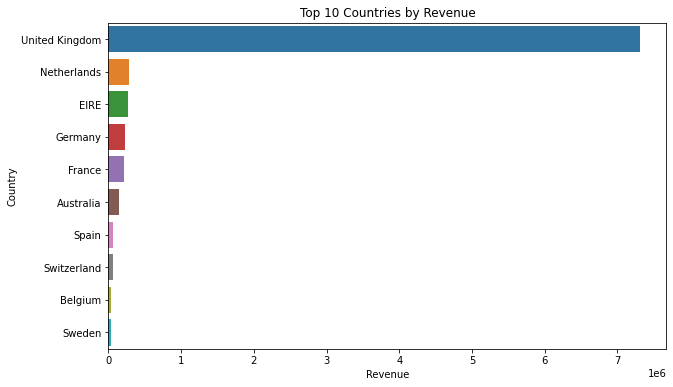

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Countries by Revenue
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(10,6))
sns.barplot(x=country_revenue.values, y=country_revenue.index)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()


In [7]:
df.shape

(397924, 9)

In [8]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [9]:
df = df[df["Country"]=="United Kingdom"]
df.shape

(354345, 9)

# Calculate RFM Metrics

    Recency (R): How recently a customer has made a purchase
    Frequency (F): How often a customer makes a purchase
    Monetary Value (M): Dollar value of the purchases

In [13]:
# Choose a snapshot date for recency calculation (usually max date + 1 day)
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:49:00')

In [14]:
# RFM calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()
rfm

,CustomerID,InvoiceDate,InvoiceNo,TotalPrice
0,12346.0,326,1,77183.60
1,12747.0,2,11,4196.01
2,12748.0,1,210,33719.73
3,12749.0,4,5,4090.88
4,12820.0,3,4,942.34
...,...,...,...,...
3916,18280.0,278,1,180.60
3917,18281.0,181,1,80.82
3918,18282.0,8,2,178.05
3919,18283.0,4,16,2094.88


In [15]:
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

rfm = rfm[rfm['Monetary'] > 0]
print(rfm.shape)

rfm.reset_index()
rfm.head()

(3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,2,11,4196.01
2,12748.0,1,210,33719.73
3,12749.0,4,5,4090.88
4,12820.0,3,4,942.34


In [16]:
rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

## Visualize R, F, M Individually

<AxesSubplot:xlabel='Recency', ylabel='Count'>

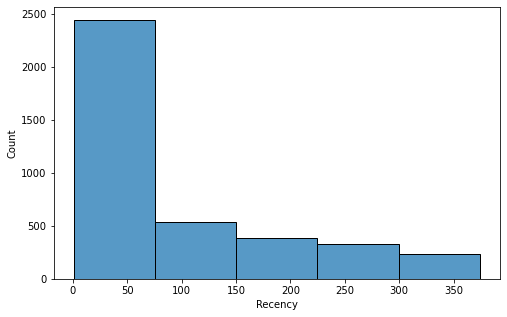

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(rfm['Recency'], bins=5)

<AxesSubplot:xlabel='Frequency', ylabel='Count'>

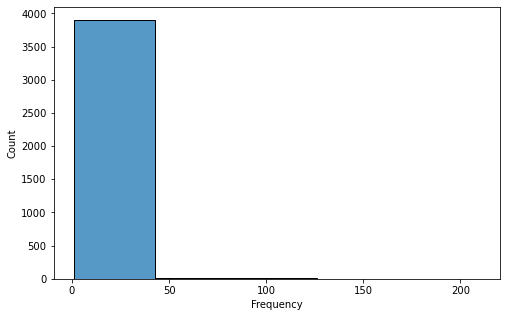

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(rfm['Frequency'], bins=5)

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

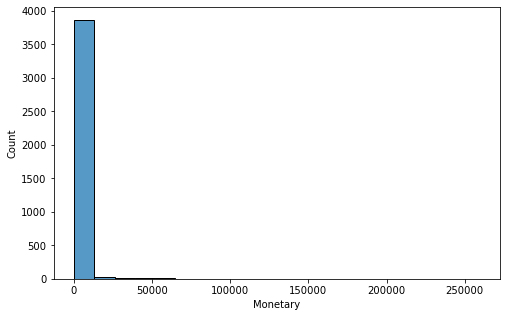

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(rfm['Monetary'], bins=20)

## Pair Plots – R vs F, F vs M, R vs M

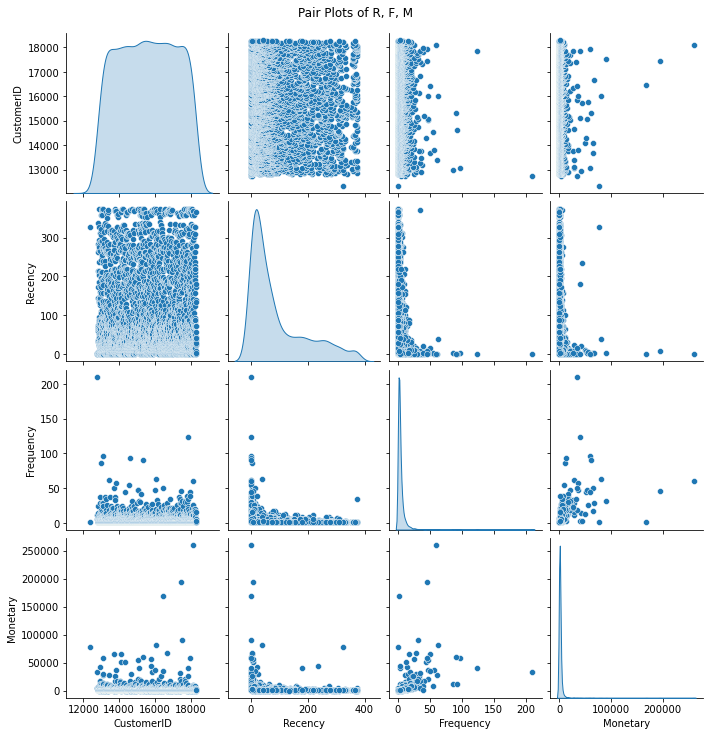

In [20]:
sns.pairplot(rfm, diag_kind='kde')
plt.suptitle("Pair Plots of R, F, M", y=1.02)
plt.show()


# RFM Segmentation

### Bucketing into Quantiles

    We can bucket the customers based on the above 3 Factors(RFM). like, put all the customers whose Recency is less than 60 days in 1 bucket. Similarly, customers whose Recency is greater than 60 days and less than 120 days in another bucket. we will apply the same concept for Frequency and Monetary also.

    Depending on the Company’s objectives, Customers can be segmented in several ways. so that it is financially possible to make marketing campaigns.

    The ideal customers for e-commerce companies are generally the most recent ones compared to the date of study(our reference date) who are very frequent and who spend enough.

    Based on the RFM Values, I have assigned a score to each customer between 1 and 3(bucketing them). 3 is the best score and 1 is the worst score.

In [21]:
# R - lower is better; F & M - higher is better
r_labels = range(5, 0, -1)
f_labels = m_labels = range(1, 6)

rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=r_labels)

rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=f_labels)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=m_labels)

# Convert to integers
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)


<ipython-input-21-cbc0bc906b4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=r_labels)
<ipython-input-21-cbc0bc906b4e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=f_labels)
<ipython-input-21-cbc0bc906b4e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

    r_labels = range(5, 0, -1)
    Means:

    You're creating labels from 5 to 1 (descending).

    This is important for Recency, because:

    A lower Recency (more recent purchase) is better.

    So customers with lowest recency (most recent) get score 5, and highest recency (least recent) get score 1.

    f_labels = m_labels = range(1, 6)
    Means:

    For Frequency and Monetary, higher is better.

    So customer with highest Frequency or Monetary gets score 5, lowest gets score 1.

    rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=r_labels)
    Means:

    You are dividing Recency column into 5 equal-sized buckets (quintiles) using pd.qcut()

    Then, assigning labels from 5 to 1 based on which quantile a customer falls into.

    So the most recent 20% of customers get R_Score = 5, next 20% get 4, and so on down to 1.

    What is qcut?

    pd.qcut(column, q=5, labels=...)
    It divides a column into equal-sized quantile bins.

    Good for scoring customers into buckets based on distribution.



In [22]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346.0,326,1,77183.60,1,1,5
1,12747.0,2,11,4196.01,5,5,5
2,12748.0,1,210,33719.73,5,5,5
3,12749.0,4,5,4090.88,5,4,5
4,12820.0,3,4,942.34,5,4,4
...,...,...,...,...,...,...,...
3916,18280.0,278,1,180.60,1,2,1
3917,18281.0,181,1,80.82,1,2,1
3918,18282.0,8,2,178.05,5,3,1
3919,18283.0,4,16,2094.88,5,5,5


# Combine to RFM Score

In [23]:
rfm['RFM_Score'] = rfm['R_Score'].map(str) + rfm['F_Score'].map(str) + rfm['M_Score'].map(str)

# View sample
rfm.head()


<ipython-input-23-079772bc9853>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM_Score'] = rfm['R_Score'].map(str) + rfm['F_Score'].map(str) + rfm['M_Score'].map(str)


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,115
1,12747.0,2,11,4196.01,5,5,5,555
2,12748.0,1,210,33719.73,5,5,5,555
3,12749.0,4,5,4090.88,5,4,5,545
4,12820.0,3,4,942.34,5,4,4,544


## Visualize RFM Scores

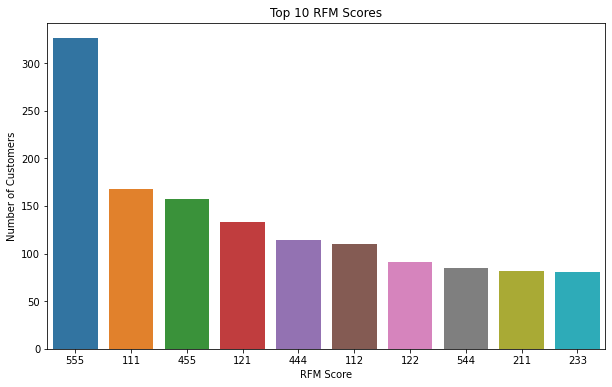

In [24]:
# Top 10 RFM Scores
top_scores = rfm['RFM_Score'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_scores.index, y=top_scores.values)
plt.title("Top 10 RFM Scores")
plt.xlabel("RFM Score")
plt.ylabel("Number of Customers")
plt.show()


# Segmenting Customers

In [25]:
def segment_customer(df):
    if df['RFM_Score'] == '555':
        return 'Champions'
    elif df['R_Score'] >= 4:
        return 'Loyal Customers'
    elif df['F_Score'] >= 4:
        return 'Frequent Buyers'
    elif df['M_Score'] >= 4:
        return 'Big Spenders'
    elif df['R_Score'] <= 2:
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm

<ipython-input-25-d05b4cf3d161>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm.apply(segment_customer, axis=1)


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,5,115,Big Spenders
1,12747.0,2,11,4196.01,5,5,5,555,Champions
2,12748.0,1,210,33719.73,5,5,5,555,Champions
3,12749.0,4,5,4090.88,5,4,5,545,Loyal Customers
4,12820.0,3,4,942.34,5,4,4,544,Loyal Customers
...,...,...,...,...,...,...,...,...,...
3916,18280.0,278,1,180.60,1,2,1,121,At Risk
3917,18281.0,181,1,80.82,1,2,1,121,At Risk
3918,18282.0,8,2,178.05,5,3,1,531,Loyal Customers
3919,18283.0,4,16,2094.88,5,5,5,555,Champions


# Segment Count Plot

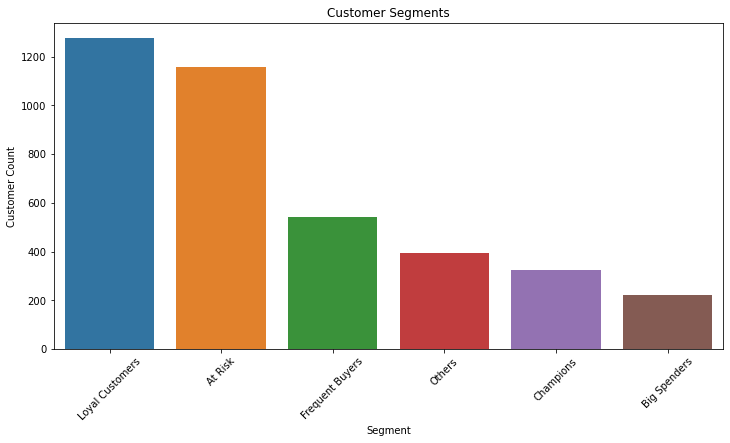

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title("Customer Segments")
plt.xlabel("Segment")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.show()


# Recommendations for Marketing

    Segment         | Recommendation
    Champions       | Reward them with exclusive offers
    Loyal Customers | Encourage referrals
    Frequent Buyers | Recommend new products
    Big Spenders    | Offer high-end products
    At Risk         | Re-engagement campaigns
    Others          | Observe and gather more data

    We can use K-Means to group customers into natural clusters instead of using rule-based segmentation (like “RFM Score = 555”). 
    This allows more flexibility and insight, especially when patterns in customer behavior are not obvious.

    Why Use K-Means for RFM?
    K-Means will help you:

    Discover natural clusters in customer behavior

    Group similar customers even when their raw RFM scores differ

    Create data-driven customer personas

In [27]:
# Use only RFM values, no scores
rfm_clustering = rfm[['Recency', 'Frequency', 'Monetary']].copy()
rfm_clustering


,Recency,Frequency,Monetary
0,326,1,77183.60
1,2,11,4196.01
2,1,210,33719.73
3,4,5,4090.88
4,3,4,942.34
...,...,...,...
3916,278,1,180.60
3917,181,1,80.82
3918,8,2,178.05
3919,4,16,2094.88


In [28]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)


In [29]:
rfm_scaled

array([[ 2.34916460e+00, -4.50615532e-01,  1.00669064e+01],
       [-9.06424525e-01,  9.37201002e-01,  3.11636875e-01],
       [-9.16472639e-01,  2.85547500e+01,  4.25767546e+00],
       ...,
       [-8.46135837e-01, -3.11833878e-01, -2.25389800e-01],
       [-8.86328295e-01,  1.63110927e+00,  3.08070865e-02],
       [-4.94451826e-01, -1.73052225e-01, -3.62284108e-03]])

## Apply K-Means

In [31]:
# Let's say elbow shows k=4
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


<ipython-input-31-2fac3dc43889>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


# Visualize Clusters


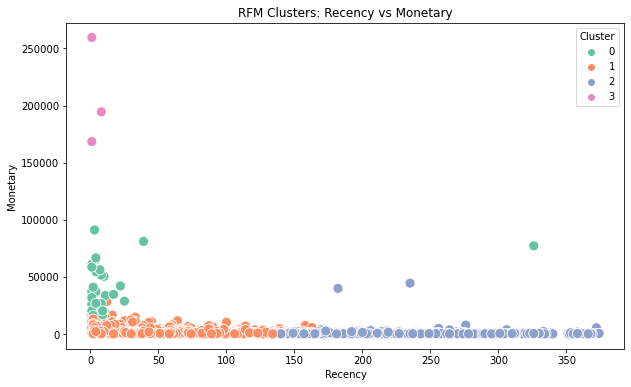

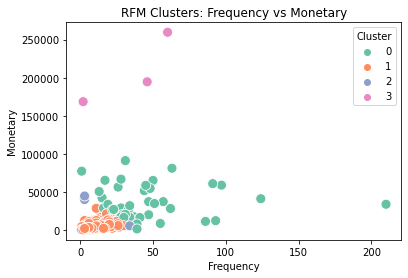

In [32]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title('RFM Clusters: Recency vs Monetary')
plt.show()

sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title('RFM Clusters: Frequency vs Monetary')
plt.show()


In [ ]:
Analyze Each Cluster

In [33]:
# Group by cluster and analyze
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

cluster_summary.columns = ['Recency_Mean', 'Frequency_Mean', 'Monetary_Mean', 'Customer_Count']
cluster_summary.reset_index()


,Cluster,Recency_Mean,Frequency_Mean,Monetary_Mean,Customer_Count
0,0,12.2,43.8,31172.2,52
1,1,41.4,4.4,1579.9,2876
2,2,244.6,1.6,526.7,989
3,3,3.3,36.0,207560.2,3


    Business Interpretation

    Cluster                     |Description
    Low Recency, High F & M	    | Champions or Loyal
    High Recency, Low F & M	    | Dormant or At-Risk
    Moderate R, F, M	        | Potential Loyalists
    Low Frequency	            | Occasional Shoppers